In [1]:
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train= pd.read_csv("train.csv", index_col='Id')
test = pd.read_csv("test.csv", index_col='Id')

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
train.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [7]:
train.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


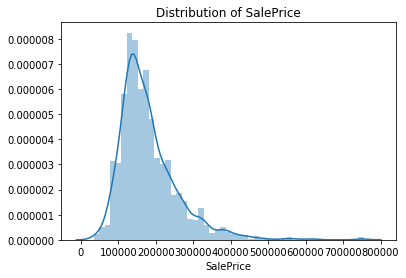

In [8]:
target = train.SalePrice
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()


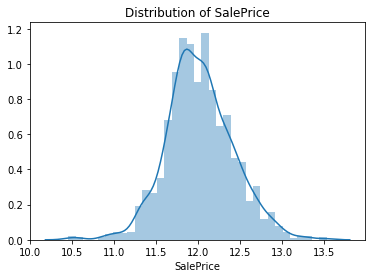

In [9]:
target = train.SalePrice
plt.figure()
sns.distplot(np.log(target))
plt.title('Distribution of SalePrice')
plt.show()

In [10]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed SalePrice improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

SalePrice has a skew of 1.88 while the log-transformed SalePrice improves the skew to 0.12


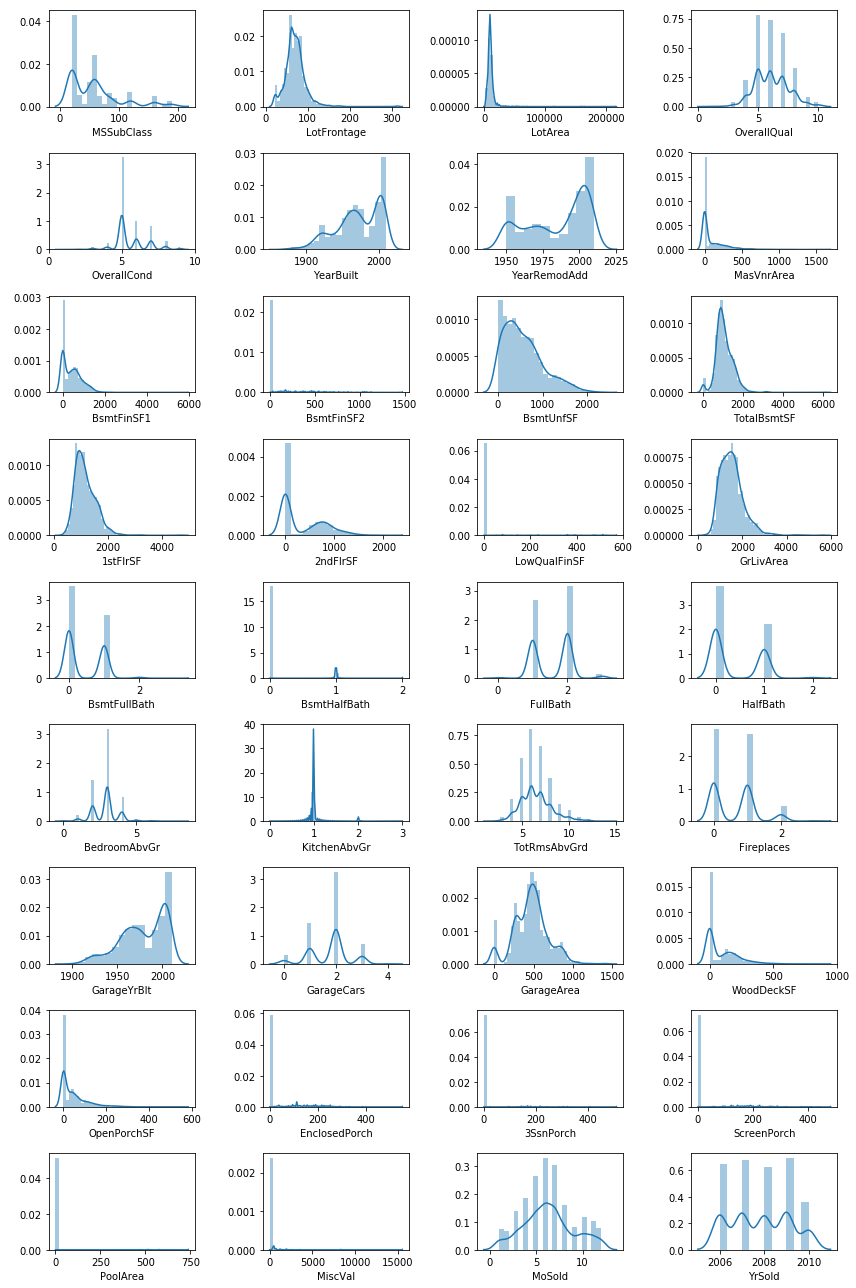

In [11]:
num_attributes = train.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
#     print(num_attributes.iloc[:,i])
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

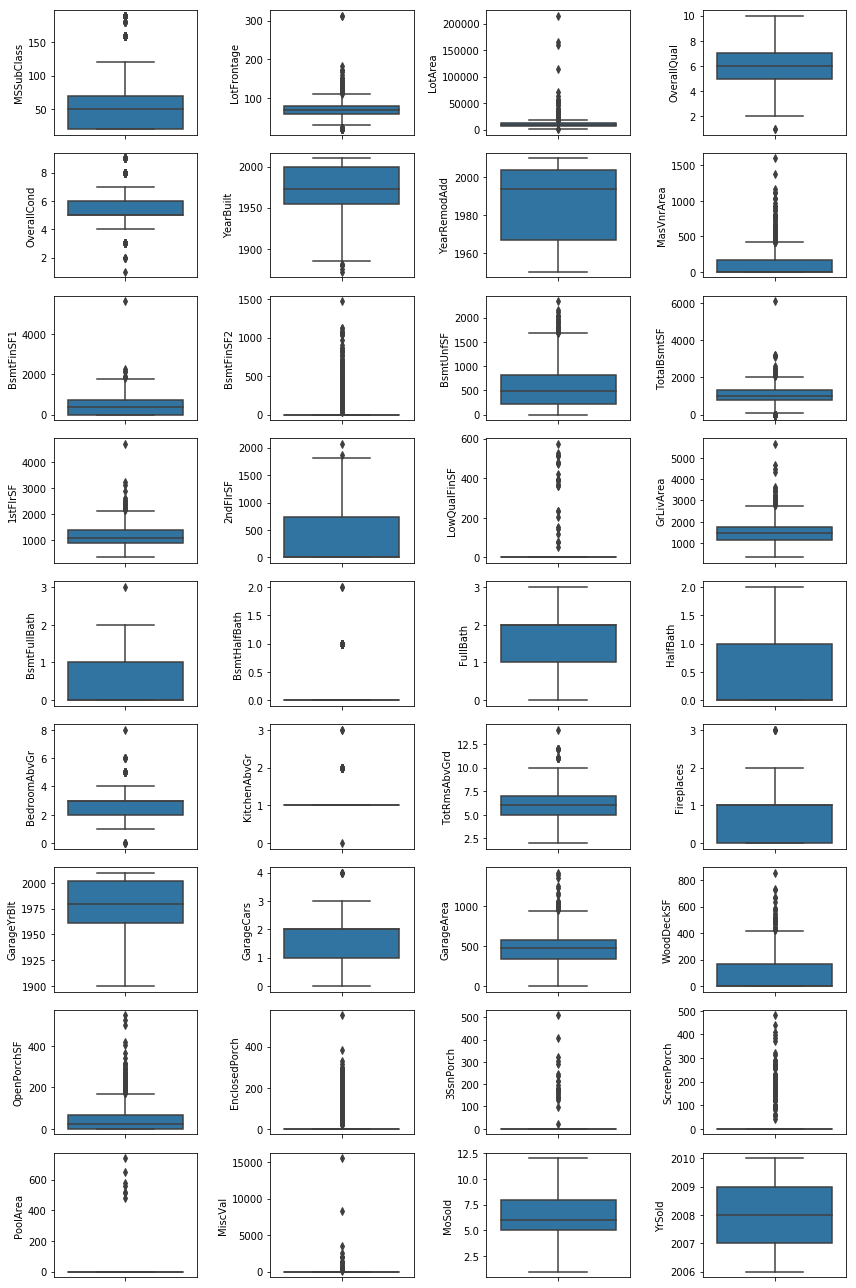

In [12]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

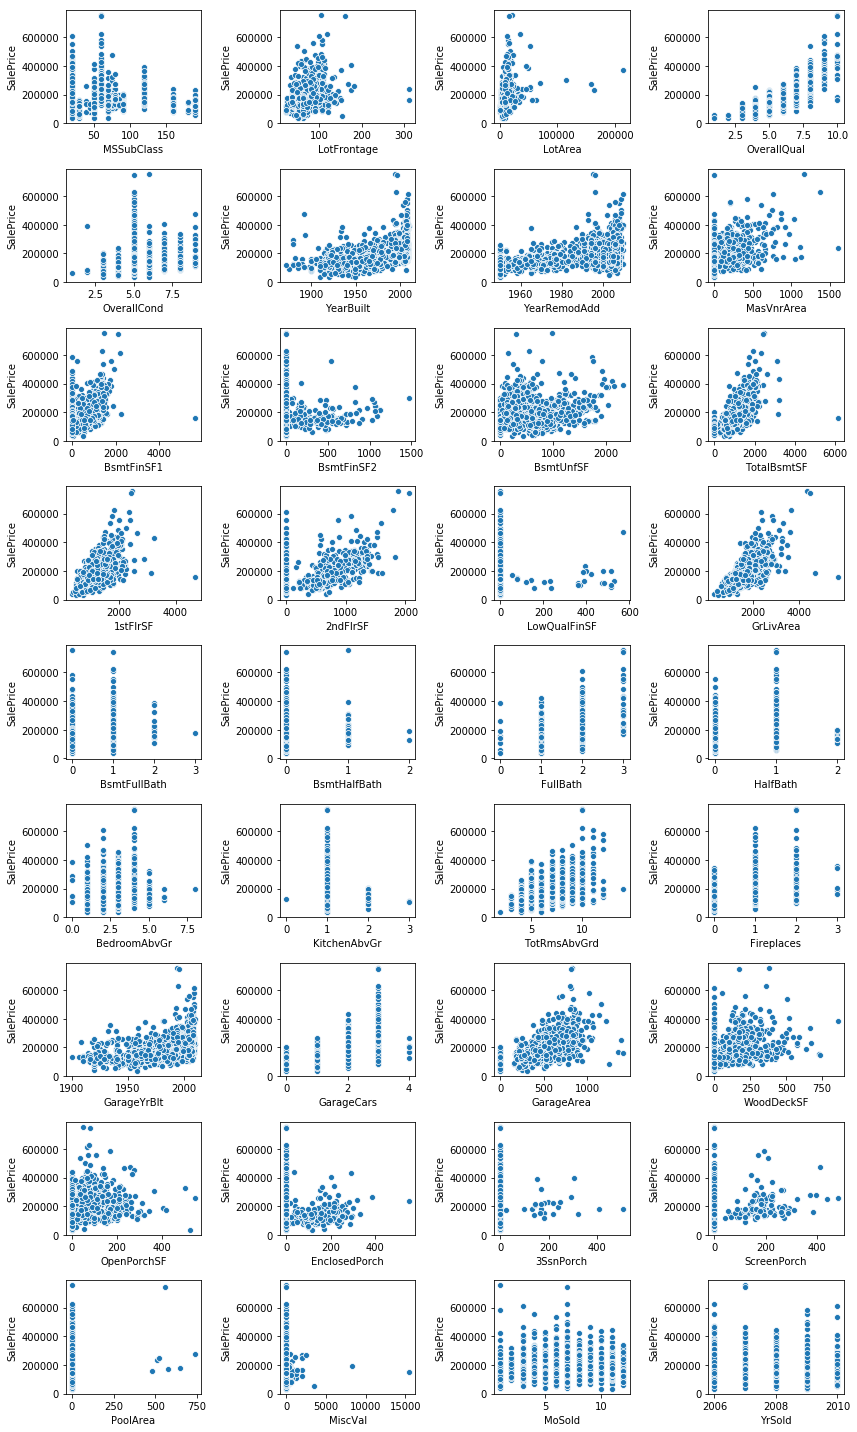

In [13]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

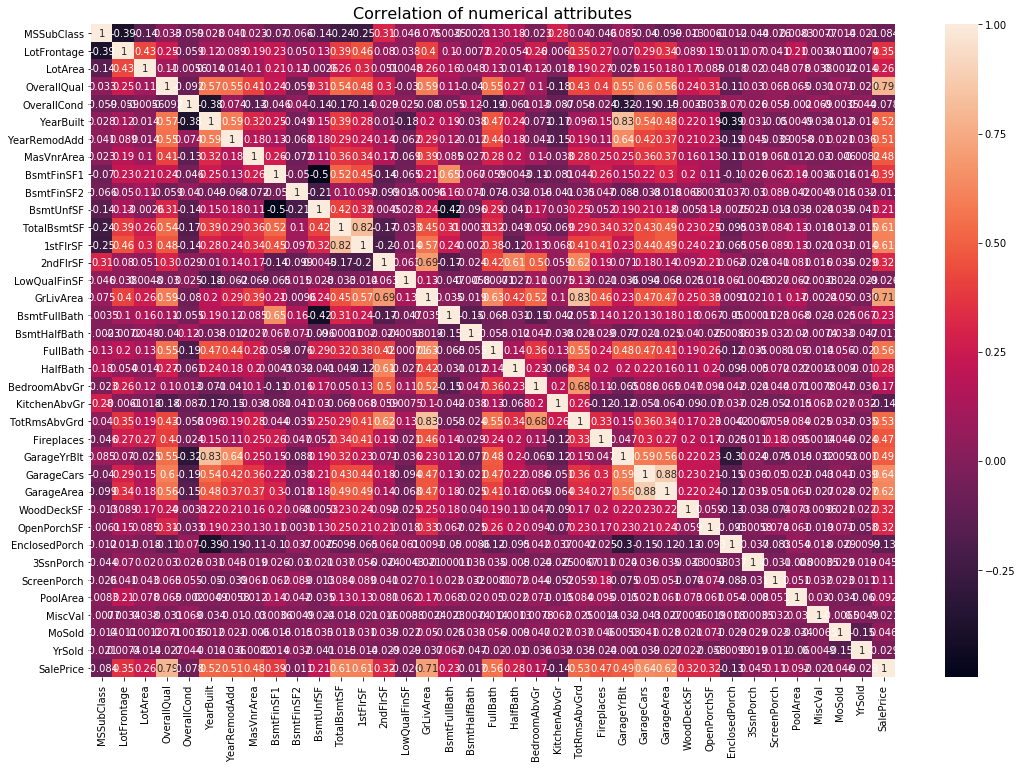

In [14]:
correlation = train.corr()

f, ax = plt.subplots(figsize=(18,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation, annot=True)
plt.show()

## Heatmap with annotation of correlation values
#sns.heatmap(train.corr(), annot=True)

In [15]:
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

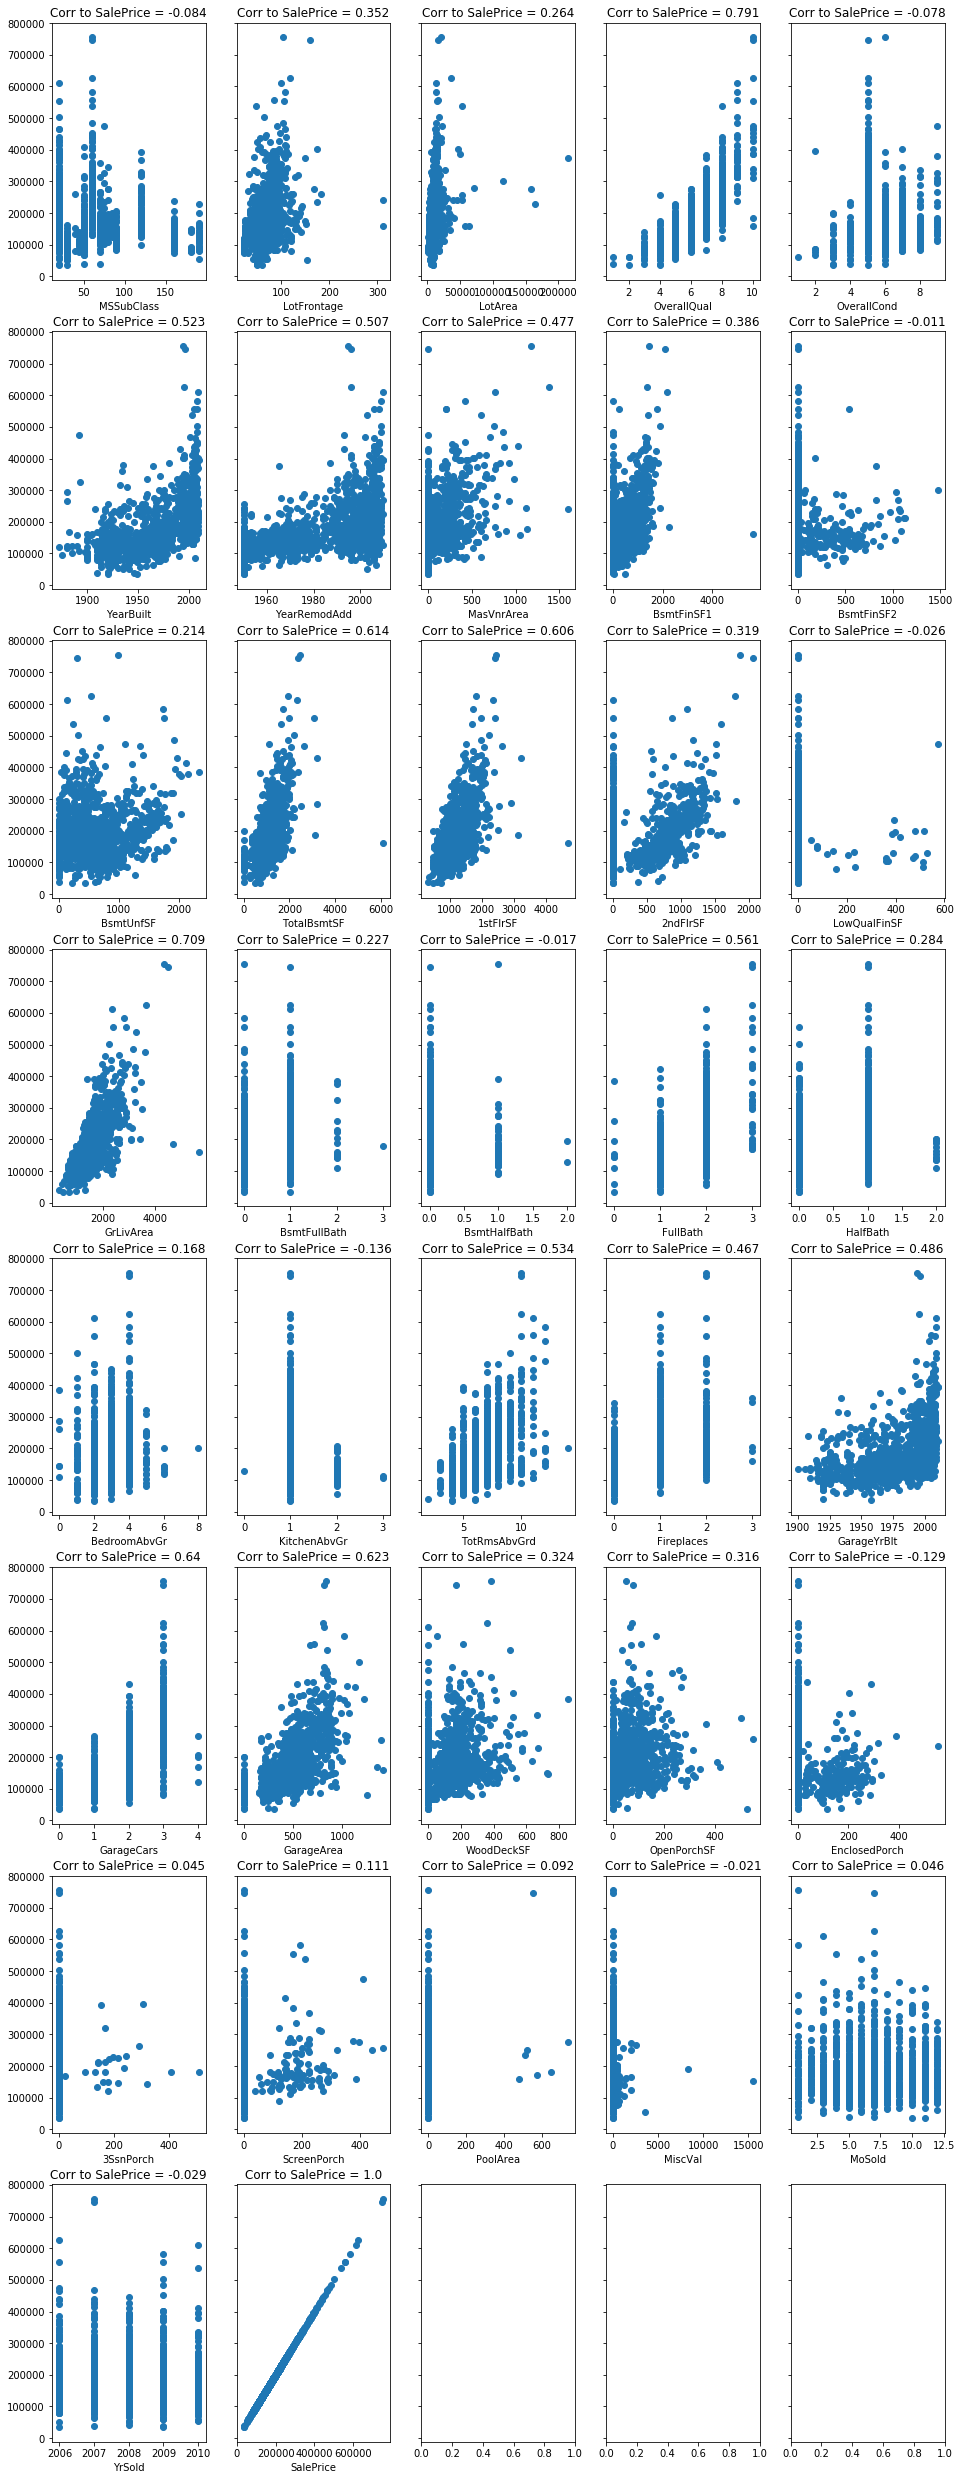

In [16]:
num_columns = train.select_dtypes(exclude='object').columns
corr_to_price = correlation['SalePrice']
n_cols = 5
n_rows = 8
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_columns):
            plt.scatter(train[num_columns[index]], train.SalePrice)
            plt.xlabel(num_columns[index])
            plt.title('Corr to SalePrice = '+ str(np.around(corr_to_price[index], decimals=3)))
plt.show()

In [17]:
# missing values

num_attributes.isna().sum().sort_values(ascending=False).head() 

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

### Exploring Categorical Data

In [18]:
cat_columns= train.select_dtypes(include='object').columns
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

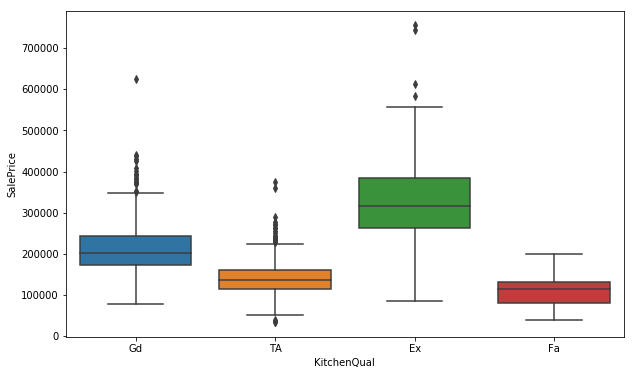

In [19]:
var = train['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=train.SalePrice, x=var)
plt.show()

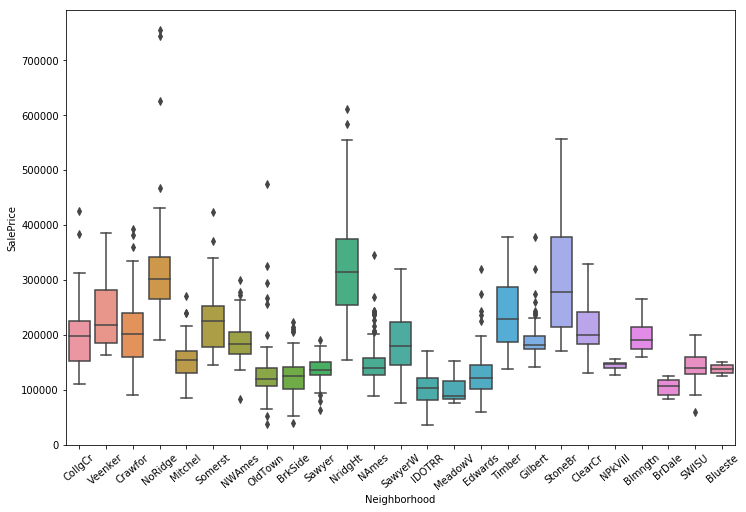

In [20]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=train.SalePrice, x=train.Neighborhood)
plt.xticks(rotation=40)
plt.show()

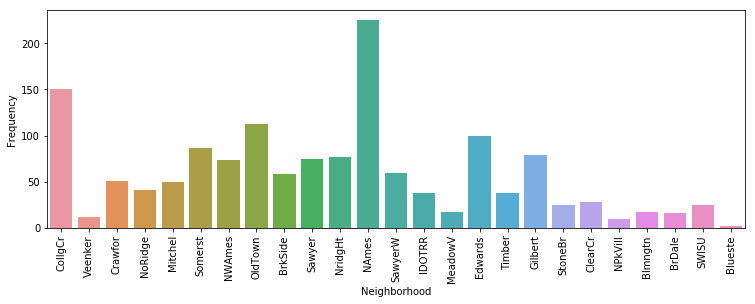

In [21]:
## Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=train)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


In [22]:
# missing values in categorical data

train[cat_columns].isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

## Data Cleaning Process


In [23]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [24]:
# Create copy of dataset
train_copy= train.copy()


# Dealing with missing/null values 
# Numerical columns:
train_copy.MasVnrArea = train_copy.MasVnrArea.fillna(0)
# HOW TO TREAT LotFrontage - 259 missing values??

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    train_copy[cat] = train_copy[cat].fillna("None")
    


In [25]:
# Check for outstanding missing/null values
# Scikit-learn's Imputer will be used to address these
train_copy.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
Electrical       1
SalePrice        0
Foundation       0
dtype: int64

## Addressing Outliers

In [26]:
# Remove outliers based on observations on scatter plots against SalePrice:
home_data_copy=train_copy
home_data_copy = home_data_copy.drop(home_data_copy['LotFrontage']
                                     [home_data_copy['LotFrontage']>200].index)
home_data_copy = home_data_copy.drop(home_data_copy['LotArea']
                                     [home_data_copy['LotArea']>100000].index)
home_data_copy = home_data_copy.drop(home_data_copy['BsmtFinSF1']
                                     [home_data_copy['BsmtFinSF1']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy['TotalBsmtSF']
                                     [home_data_copy['TotalBsmtSF']>6000].index)
home_data_copy = home_data_copy.drop(home_data_copy['1stFlrSF']
                                     [home_data_copy['1stFlrSF']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy.GrLivArea
                                     [(home_data_copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
home_data_copy = home_data_copy.drop(home_data_copy.LowQualFinSF
                                     [home_data_copy['LowQualFinSF']>550].index)

In [27]:
# transforming the skew data 

home_data_copy['SalePrice'] = np.log(home_data_copy['SalePrice'])

home_data_copy = home_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})

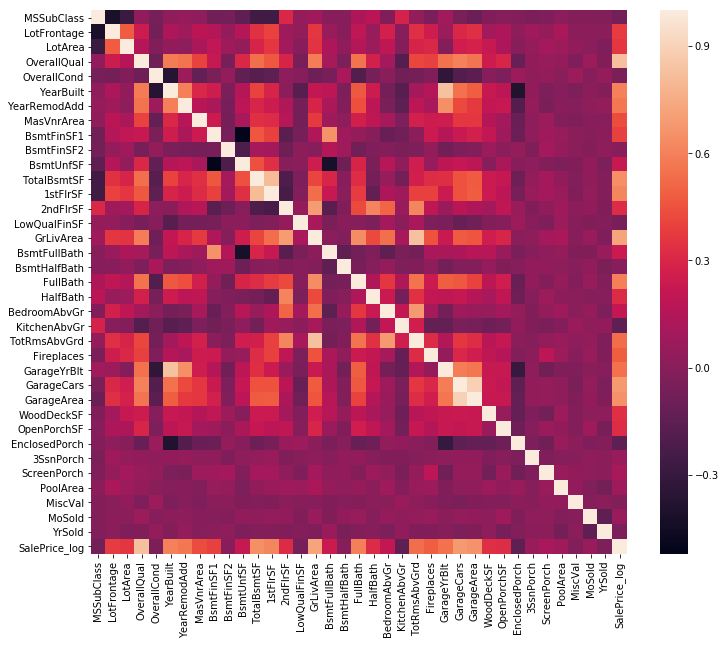

In [28]:
#correlation

transformed_corr = home_data_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)

In [29]:
home_data_copy.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [30]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attributes

X = home_data_copy.drop(attributes_drop, axis=1)

# Create target object and call it y
y = home_data_copy.SalePrice_log

# One hot-encoding to transform all categorical data
X = pd.get_dummies(X)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Normalisation - to be added later
# normaliser = StandardScaler()
# train_X = normaliser.fit_transform(train_X)
# val_X = normaliser.transform(val_X)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)


## 4. Preliminary Assessment of Machine Learning Algorithms

### Import machine learning modules

In [31]:
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [32]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

#Specify Model ================================
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
mae_compare['DecisionTree'] = val_mae
# print("Validation MAE for Decision Tree when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

#Decision Tree. Using best value for max_leaf_nodes ==============
iowa_model = DecisionTreeRegressor(max_leaf_nodes=90, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
mae_compare['DecisionTree_opt_max_leaf_nodes'] = val_mae
# print("Validation MAE for Decision Tree with best value of max_leaf_nodes: {:,.0f}".format(val_mae))

# Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))

mae_compare['RandomForest'] = rf_val_mae
# print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))


# XGBoost. Define the model. ======================================
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))

mae_compare['XGBoost'] = xgb_val_mae
# print("Validation MAE for XGBoost Model: {:,.0f}".format(xgb_val_mae))

# Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))

mae_compare['LinearRegression'] = linear_val_mae
# print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

# Lasso ==============================================================
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))

mae_compare['Lasso'] = lasso_val_mae
# print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

# Ridge ===============================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))

mae_compare['Ridge'] = ridge_val_mae
# print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))

# ElasticNet ===========================================================
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(val_y))

mae_compare['ElasticNet'] = elastic_net_val_mae
# print("Validation MAE for Elastic Net Model: {:,.0f}".format(elastic_net_val_mae))

# KNN Regression ========================================================
knn_model = KNeighborsRegressor()
knn_model.fit(train_X, train_y)
knn_val_predictions = knn_model.predict(val_X)
knn_val_mae = mean_absolute_error(inv_y(knn_val_predictions), inv_y(val_y))

mae_compare['KNN'] = knn_val_mae
# # print("Validation MAE for KNN Model: {:,.0f}".format(knn_val_mae))

# Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))

mae_compare['GradientBoosting'] = gbr_val_mae
# print("Validation MAE for Gradient Boosting Model: {:,.0f}".format(gbr_val_mae))

# # Ada Boost Regression ================================================
ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=5)
ada_model.fit(train_X, train_y)
ada_val_predictions = ada_model.predict(val_X)
ada_val_mae = mean_absolute_error(inv_y(ada_val_predictions), inv_y(val_y))

mae_compare['AdaBoost'] = ada_val_mae
# print("Validation MAE for Ada Boost Model: {:,.0f}".format(ada_val_mae))

# Support Vector Regression ===========================================
svr_model = SVR(kernel='linear')
svr_model.fit(train_X, train_y)
svr_val_predictions = svr_model.predict(val_X)
svr_val_mae = mean_absolute_error(inv_y(svr_val_predictions), inv_y(val_y))

mae_compare['SVR'] = svr_val_mae
# print("Validation MAE for SVR Model: {:,.0f}".format(svr_val_mae))

print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()


MAE values for different algorithms:


Algorithm
Lasso                              1.368700e+04
Ridge                              1.427200e+04
LinearRegression                   1.441900e+04
XGBoost                            1.460100e+04
GradientBoosting                   1.471400e+04
RandomForest                       1.646200e+04
ElasticNet                         1.674300e+04
AdaBoost                           2.274700e+04
DecisionTree_opt_max_leaf_nodes    2.316200e+04
DecisionTree                       2.419300e+04
KNN                                3.020300e+04
SVR                                7.051129e+71
dtype: float64

## Cross Validation

### Use scikit-learn's cross_val_score to try K-fold cross-validation.

In [33]:
from sklearn.model_selection import cross_val_score

imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10

# =========================================================================
scores = cross_val_score(lasso_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.109
Error std deviation = 0.016


In [34]:
lasso_mae_scores

array([0.1155225 , 0.09248029, 0.10457634, 0.12330725, 0.138718  ,
       0.09784412, 0.11186482, 0.09073984, 0.08931989, 0.12128072])

In [35]:
scores = cross_val_score(gbr_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
gbr_mae_scores = np.sqrt(-scores)

print('For Gradient Boosting model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(gbr_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(gbr_mae_scores.std().round(decimals=3)))

For Gradient Boosting model:
Mean RMSE = 0.119
Error std deviation = 0.018


In [36]:
scores = cross_val_score(xgb_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For XGBoost model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For XGBoost model:
Mean RMSE = 0.118
Error std deviation = 0.018


In [37]:
scores = cross_val_score(rf_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For Random Forest model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For Random Forest model:
Mean RMSE = 0.134
Error std deviation = 0.016


## Selection of Best Algorithm(s) & Fine-Tuning

### Use scikit-learn's function to grid search for the best combination of hyperparameters

In [38]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# # Tuning XGBoost
param_grid = [{'n_estimators': [1000, 1500], 
               'learning_rate': [0.01, 0.03] }]
#               'max_depth': [3, 6, 9]}]

top_reg = XGBRegressor()

# Tuning Lasso
# param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
# top_reg = Lasso()

# -------------------------------------------------------
grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(imputed_X, y)

grid_search.best_params_


{'learning_rate': 0.01, 'n_estimators': 1500}

In [39]:
# create test_X which to perform all previous pre-processing on
test_data=test
test_X = test_data.copy()


In [40]:
test_X.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageCond         78
GarageFinish       78
GarageYrBlt        78
GarageQual         78
GarageType         76
BsmtCond           45
BsmtExposure       44
BsmtQual           44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
SaleType            1
Exterior1st         1
                 ... 
YearBuilt           0
OverallCond         0
SaleCondition       0
HeatingQC           0
ExterCond           0
Foundation          0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [41]:
# Repeat treatments for missing/null values =====================================
# Numerical columns:
test_X.MasVnrArea = test_X.MasVnrArea.fillna(0)

# Categorical columns:
for cat in cat_cols_fill_none:
    test_X[cat] = test_X[cat].fillna("None")

# Repeat dropping of chosen attributes ==========================================
if 'SalePrice_log' in attributes_drop:
    attributes_drop.remove('SalePrice_log')

test_X = test_data.drop(attributes_drop, axis=1)

# One-hot encoding for categorical data =========================================
test_X = pd.get_dummies(test_X)


# ===============================================================================
# Ensure test data is encoded in the same manner as training data with align command
final_train, final_test = X.align(test_X, join='left', axis=1)

# Imputer for all other missing values in test data. Note: Do not 'fit_transform'
final_test_imputed = my_imputer.transform(final_test)

In [42]:
final_test_imputed

array([[8.0000e+01, 1.1622e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.1000e+01, 1.4267e+04, 6.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.4000e+01, 1.3830e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.6000e+02, 2.0000e+04, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.2000e+01, 1.0441e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.4000e+01, 9.6270e+03, 7.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

## Create final model

In [43]:
# Create model - on full set of data (training & validation)
# Best model = Lasso?
final_model = Lasso(alpha=0.0005, random_state=5)
# final_model = XGBRegressor(n_estimators=1500, learning_rate=0.03)
final_train_imputed = my_imputer.fit_transform(final_train)

# Fit the model using all the data - train it on all of X and y
final_model.fit(final_train_imputed, y)

Lasso(alpha=0.0005, random_state=5)

### Make predictions for submission

In [44]:
test_data.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [45]:
# make predictions which we will submit. 
test_preds = final_model.predict(final_test_imputed)

# The lines below shows you how to save your data in the format needed to score it in the competition
# Reminder: predictions are in log(SalePrice). Need to inverse-transform.
output = pd.DataFrame({'Id': test_data.index,
                       'SalePrice': inv_y(test_preds)})
output
#output.to_csv('submission.csv', index=False)

,Id,SalePrice
0,1461,119162.547662
1,1462,158381.349816
2,1463,181154.244660
3,1464,201514.324160
4,1465,191002.305407
5,1466,170358.823912
6,1467,188895.051588
7,1468,162763.228204
8,1469,192377.887593
9,1470,120852.318691
